In [1]:
!pip install datasets neattext joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" an

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
sns.set(style="whitegrid")

In [4]:
dataset = load_dataset("emotion")
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [5]:
emotion_labels = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
train_df['emotion'] = train_df['label'].map(emotion_labels)
test_df['emotion'] = test_df['label'].map(emotion_labels)

In [6]:
train_df.head()

,text,label,emotion
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [7]:
print("Train Dataset Info:")
print(train_df.info())

print("Test Dataset Info:")
print(test_df.info())

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   label    16000 non-null  int64 
 2   emotion  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB
None
Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     2000 non-null   object
 1   label    2000 non-null   int64 
 2   emotion  2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB
None


In [8]:
print("\nEmotion Distribution on Training Dataset:")
print(train_df['emotion'].value_counts())

print("\nEmotion Distribution on Testing Dataset:")
print(test_df['emotion'].value_counts())


Emotion Distribution on Training Dataset:
emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

Emotion Distribution on Testing Dataset:
emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64


<ipython-input-9-c253cf0ced0b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=train_df, order=train_df['emotion'].value_counts().index, palette='viridis')


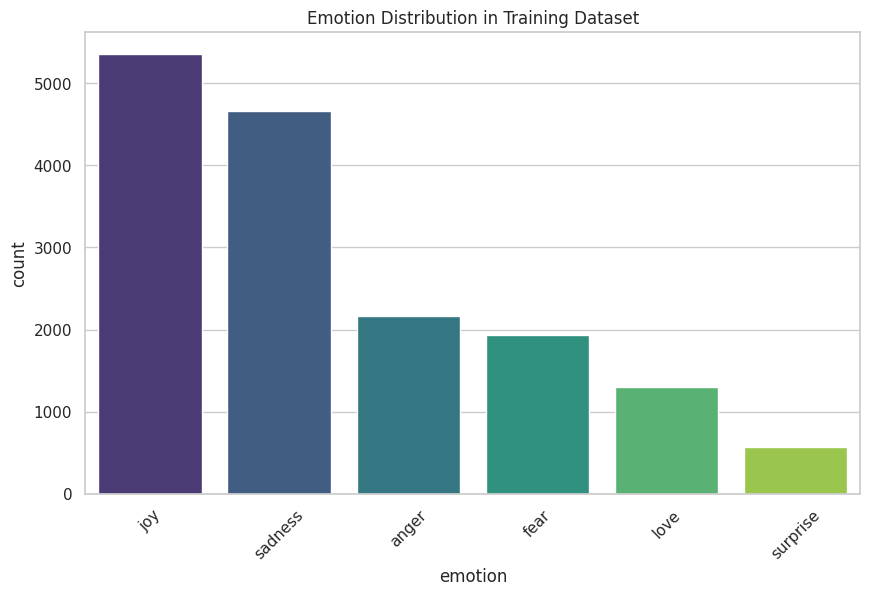

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=train_df, order=train_df['emotion'].value_counts().index, palette='viridis')
plt.title(f'Emotion Distribution in Training Dataset')
plt.xticks(rotation=45)
plt.show()

<ipython-input-10-2d1fd56920b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=test_df, order=test_df['emotion'].value_counts().index, palette='viridis')


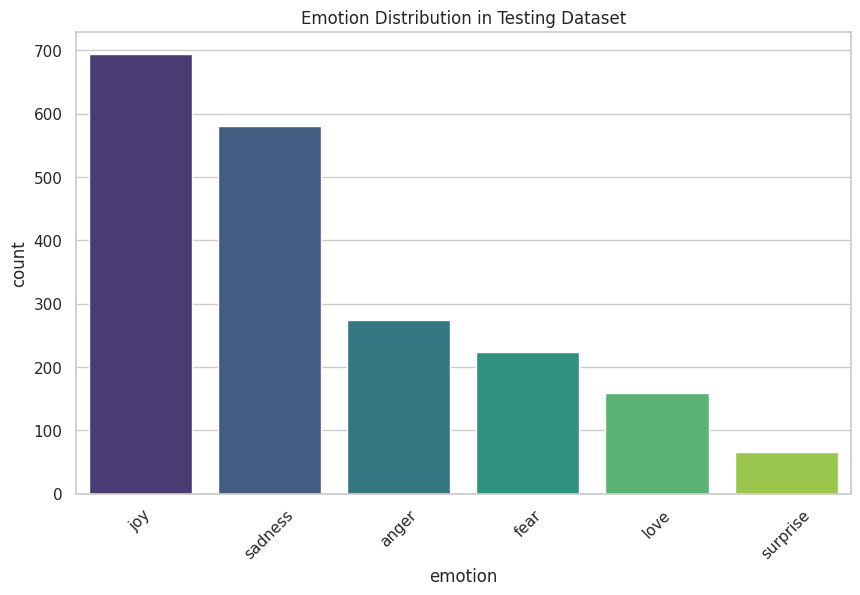

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=test_df, order=test_df['emotion'].value_counts().index, palette='viridis')
plt.title(f'Emotion Distribution in Testing Dataset')
plt.xticks(rotation=45)
plt.show()

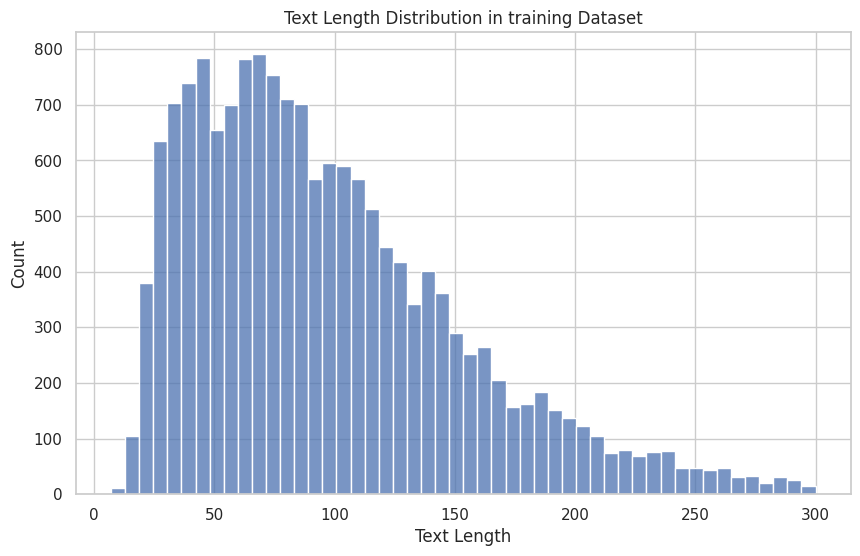

In [11]:
# Text length analysis
train_df['text_length'] = train_df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=50)
plt.title(f'Text Length Distribution in training Dataset')
plt.xlabel('Text Length')
plt.show()

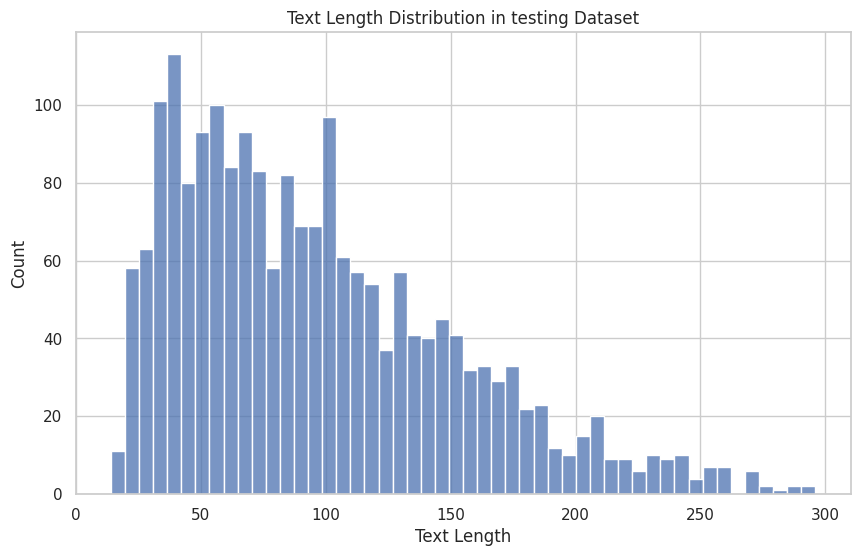

In [12]:
test_df['text_length'] = test_df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(test_df['text_length'], bins=50)
plt.title(f'Text Length Distribution in testing Dataset')
plt.xlabel('Text Length')
plt.show()

In [13]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [14]:
def tokenize_function(examples):
    return tokenizer(
        examples['text'],
        padding='max_length',
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )

tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [15]:
train_dataset = tokenized_datasets['train']
test_dataset = tokenized_datasets['test']

In [16]:
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=6
)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    return {
        'accuracy': accuracy,
    }

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [32]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

In [33]:
# Train the model
print("\nTraining DistilBERT...")
trainer.train()


Training DistilBERT...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.210800,0.204116,0.927000
2,0.095700,0.159774,0.928500
3,0.106300,0.172607,0.928500


TrainOutput(global_step=3000, training_loss=0.277707953731219, metrics={'train_runtime': 582.1759, 'train_samples_per_second': 82.449, 'train_steps_per_second': 5.153, 'total_flos': 1589722177536000.0, 'train_loss': 0.277707953731219, 'epoch': 3.0})

In [34]:
print("\nEvaluating DistilBERT on test set...")
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(-1)
y_test = predictions.label_ids


Evaluating DistilBERT on test set...


In [39]:
# Save the model and tokenizer
model_save_path = '/content/drive/MyDrive/emotion_detection/models/distilbert_emotion_model'
print(f"\nSaving the model and tokenizer to {model_save_path}...")
trainer.save_model(model_save_path)
tokenizer.save_pretrained(model_save_path)
print(f"Model and tokenizer saved successfully to {model_save_path}")


Saving the model and tokenizer to /content/drive/MyDrive/emotion_detection/models/distilbert_emotion_model...
Model and tokenizer saved successfully to /content/drive/MyDrive/emotion_detection/models/distilbert_emotion_model


In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f"DistilBERT Test Accuracy: {accuracy:.4f}")
print(f"\nClassification Report for DistilBERT:")
report = classification_report(y_test, y_pred, target_names=emotion_labels.values(), output_dict=True)
print(classification_report(y_test, y_pred, target_names=emotion_labels.values()))

DistilBERT Test Accuracy: 0.9285

Classification Report for DistilBERT:
              precision    recall  f1-score   support

     sadness       0.96      0.98      0.97       581
         joy       0.92      0.98      0.95       695
        love       0.98      0.68      0.80       159
       anger       0.95      0.90      0.92       275
        fear       0.91      0.87      0.89       224
    surprise       0.68      0.85      0.76        66

    accuracy                           0.93      2000
   macro avg       0.90      0.88      0.88      2000
weighted avg       0.93      0.93      0.93      2000



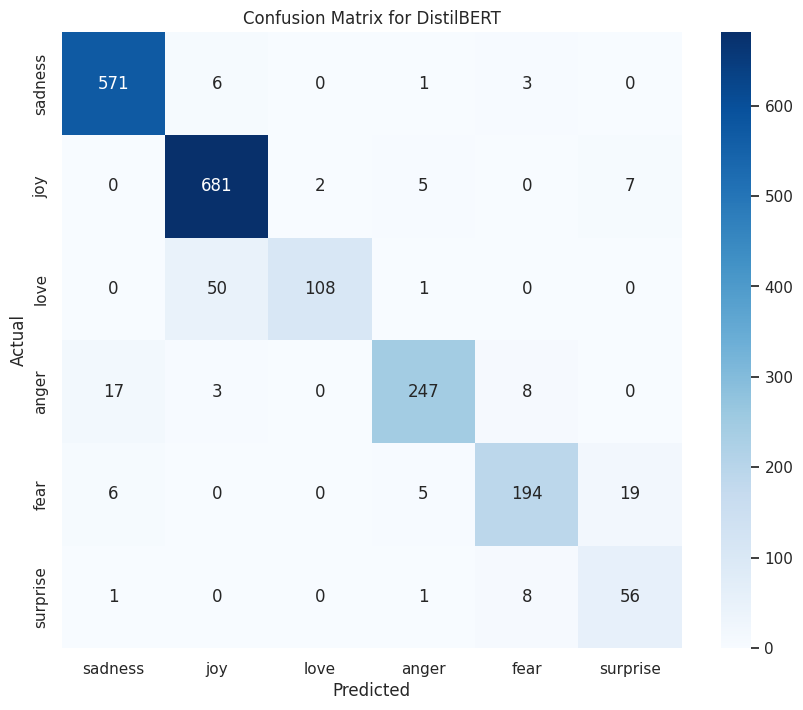

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels.values(),
            yticklabels=emotion_labels.values())
plt.title('Confusion Matrix for DistilBERT')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('confusion_matrix_distilbert.png')
plt.close()


In [38]:
# Save results
results_df = pd.DataFrame({
    'Model': ['DistilBERT'],
    'Accuracy': [accuracy]
})
results_df.to_csv('distilbert_results.csv', index=False)